<a href="https://colab.research.google.com/github/DHEERAJ09R08SINGH/AnalogClock/blob/main/Face_Recoginition_app_master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import cv2
import pywt
import matplotlib.pyplot as plt
from tensorflow import keras as kr

In [33]:
img=cv2.imread("/content/Face_Recoginition_app-master/test_image/hima.jpg")

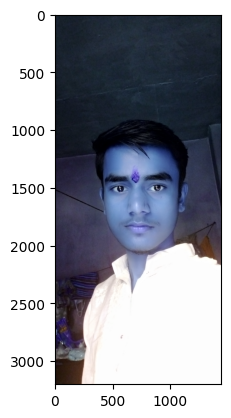

In [34]:
plt.imshow(img)

In [35]:
img.shape

(3200, 1440, 3)

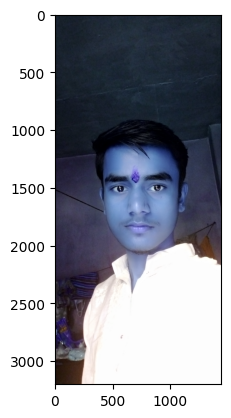

In [36]:
plt.imshow(img)

In [37]:
bgray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [38]:
bgray.shape

(3200, 1440)

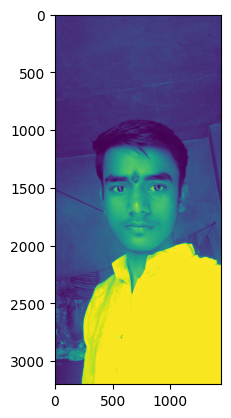

In [39]:
plt.imshow(bgray)

In [41]:
face_cascade=cv2.CascadeClassifier("/content/Face_Recoginition_app-master/opencv/frontalface_default.xml")
eye_cascade=cv2.CascadeClassifier("/content/Face_Recoginition_app-master/opencv/haarcascade_eye.xml")
faces=face_cascade.detectMultiScale(bgray,1.3,5)
faces

array([[ 326, 1188,  816,  816]], dtype=int32)

In [42]:
(x,y,w,h)=faces[0]
x,y,w,h

(326, 1188, 816, 816)

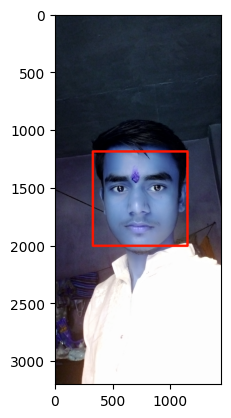

In [43]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,22,0),20) # for creating a rectangle
plt.imshow(face_img)

In [44]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),20)
    roi_gray=bgray[y:y+h,x:x+w]
    roi_color=face_img[y:y+h,x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,0,0),20)


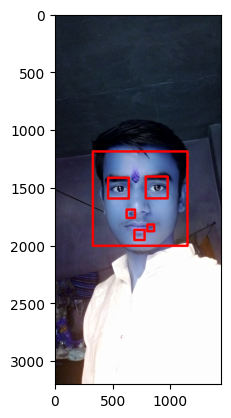

In [45]:
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

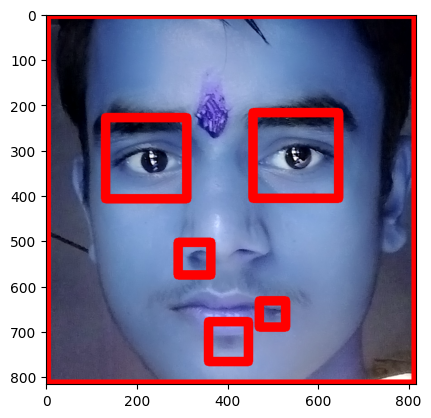

In [46]:
plt.imshow(roi_color,cmap='gray')

In [47]:
cropped_img=np.array(roi_color)
cropped_img.shape

(816, 816, 3)

In [48]:
def get_cropped_image_if_2_eyes(image_path):
    img=cv2.imread(image_path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color


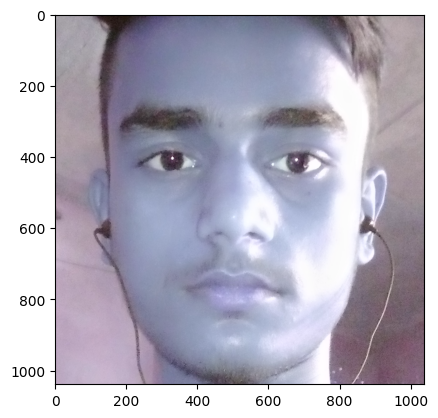

In [50]:
org_img=get_cropped_image_if_2_eyes('/content/Face_Recoginition_app-master/test_image/bhai.jpg')
plt.imshow(org_img)

In [51]:
# fatkum batch download image

In [52]:
#cd..

In [57]:
# create new folder
path_to_data="/content/Face_Recoginition_app-master/datasets"
path_to_cr_data="/content/Face_Recoginition_app-master/datasets/cropped"

In [58]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [59]:
img_dirs

['/content/Face_Recoginition_app-master/datasets/abhay',
 '/content/Face_Recoginition_app-master/datasets/cropped',
 '/content/Face_Recoginition_app-master/datasets/ramu_kaka',
 '/content/Face_Recoginition_app-master/datasets/.ipynb_checkpoints']

In [60]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [61]:
for img_dir in img_dirs:
        for entry in os.scandir(img_dir):
            print(entry.path)

/content/Face_Recoginition_app-master/datasets/abhay/allu (13).jpg
/content/Face_Recoginition_app-master/datasets/abhay/allu (12).jpg
/content/Face_Recoginition_app-master/datasets/abhay/allu (10).jpg
/content/Face_Recoginition_app-master/datasets/abhay/allu (19).jpg
/content/Face_Recoginition_app-master/datasets/abhay/allu (7).jpg
/content/Face_Recoginition_app-master/datasets/abhay/allu (9).jpg
/content/Face_Recoginition_app-master/datasets/abhay/allu (2).jpg
/content/Face_Recoginition_app-master/datasets/abhay/allu (17).jpg
/content/Face_Recoginition_app-master/datasets/abhay/allu (14).jpg
/content/Face_Recoginition_app-master/datasets/abhay/allu (18).jpg
/content/Face_Recoginition_app-master/datasets/abhay/allu (20).jpg
/content/Face_Recoginition_app-master/datasets/abhay/allu (5).jpg
/content/Face_Recoginition_app-master/datasets/abhay/allu (3).jpg
/content/Face_Recoginition_app-master/datasets/abhay/allu (11).jpg
/content/Face_Recoginition_app-master/datasets/abhay/allu (8).jpg
/

In [62]:
cropped_image_dirs=[]
celebrity_file_name_dict={}
for img_dir in img_dirs:
    count=1
    celebrity_name=img_dir.split('/')[-1]
    celebrity_file_name_dict[celebrity_name]=[]
    for entry in os.scandir(img_dir):
        roi_color=get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder=path_to_cr_data+celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("generating cropped image in folder:",cropped_folder)

            cropped_file_name=celebrity_name+str(count)+".png"
            cropped_file_path=cropped_folder+"/"+cropped_file_name

            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_name_dict[celebrity_name].append(cropped_file_path)
            count +=1


generating cropped image in folder: /content/Face_Recoginition_app-master/datasets/croppedabhay
generating cropped image in folder: /content/Face_Recoginition_app-master/datasets/croppedramu_kaka


In [63]:
class_dict={}
count=0
for celebrity_name in celebrity_file_name_dict.keys():
    class_dict[celebrity_name]=count
    count=count+1
print(class_dict)


{'abhay': 0, 'cropped': 1, 'ramu_kaka': 2, '.ipynb_checkpoints': 3}


In [64]:
def w2d(img,mode,level):
    imArray=img
    imArray=cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    imArray=np.float32(imArray)
    imArray/=255
    # computer coaficiant
    coeffs=pywt.wavedec2(imArray,mode,level=level)

    # process coaficiant
    coeffs_H=list(coeffs)
    coeffs_H[0]*=0

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H,mode)
    imArray_H*=255
    imArray_H=np.uint8(imArray_H)


    return imArray_H


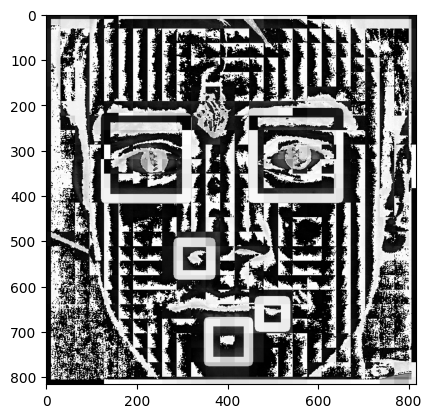

In [65]:
im_har=w2d(cropped_img,'db1',5)
plt.imshow(im_har,cmap='gray')

In [66]:
x,y=[],[]
for celebrity_name,training_files in celebrity_file_name_dict.items():
    for training_image in training_files:
        img=cv2.imread(training_image)
        scalled_raw_img=cv2.resize(img,(32,32))

        img_har=w2d(img,'db1',5)
        scalled_img_har=cv2.resize(img_har,(32,32))
        combined_image=np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))

        x.append(combined_image)
        y.append(class_dict[celebrity_name])

In [67]:
len(x)

15

In [68]:
len(x[0])
x[0]

array([[ 22],
       [ 73],
       [158],
       ...,
       [ 22],
       [240],
       [253]], dtype=uint8)

In [69]:
x[0]

array([[ 22],
       [ 73],
       [158],
       ...,
       [ 22],
       [240],
       [253]], dtype=uint8)

In [70]:
x=np.array(x).reshape(len(x),4096).astype(float)
x.shape

(15, 4096)

In [71]:
x[0]

array([ 22.,  73., 158., ...,  22., 240., 253.])

In [72]:
# training through SVM

In [75]:
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [76]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
clf=SVC(kernel='rbf')

#fighting x sample and y classe
clf.fit(x_train,y_train)

SVC()

In [79]:
y_pred=clf.predict(x_test)

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [82]:
svm_obj=SVC()
fr_model=svm_obj.fit(x_train,y_train)
y_pred=fr_model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[4]])

In [83]:
# pip install joblib
import joblib
# save the model as a pickle in a file
joblib.dump(clf.predict,'saved_model.pkl')

['saved_model.pkl']

In [84]:
# kon boot , how to unlock computer without password

In [85]:
# SAM file,system32/config

In [86]:
# safe mood